Student Name: Abdirahman Yussuf
Student Pace: DSF-FT12-Hybrid
Instructor Name: Samuel Karu

 Box Office Performance Analysis for New Movie Studio

##  Business Problem
The company needs insights into what characteristics contribute most to a film's box office success. By analyzing historical data on box office earnings and production budgets, we aim to identify patterns that can guide production and investment strategies.

Main Questions
Do higher production budgets result in higher box office returns?
Which genres or studios consistently generate high grossing films?
Is there a correlation between budget and return on investment (ROI)

1. **Importing Libraries:**
   - `pandas` is used for data manipulation and analysis.
   - `sqlite3` is used to connect and query the SQLite database.

2. **Loading the BOM Dataset:**
   - The **Box Office Movie Gross dataset** is loaded from a compressed CSV file (`bom.movie_gross.csv.gz`) into a pandas DataFrame called `bom_df`.

3. **Connecting to the IMDB Database:**
   - A connection to the **IMDB SQLite database** (`im.db`) is established using `sqlite3.connect`.

4. **Loading Key Tables from IMDB Database:**
   - SQL queries are executed to load five important tables from the IMDB database:
     - `movie_basics`: Contains basic movie information.
     - `movie_ratings`: Contains the ratings for the movies.
     - `directors`: Contains information about directors.
     - `writers`: Contains information about writers.
     - `persons`: Contains information about individuals involved in the movies.

5. **Previewing Data:**
   - The `movie_basics` table is previewed, which holds essential information about the movies.

This code sets up the data for further analysis by combining Box Office performance with movie details from IMDB.


In [140]:
import pandas as pd
import sqlite3

# Load BOM dataset
bom_df = pd.read_csv('../zipped-data/bom.movie_gross.csv.gz')

# Connect to IMDB SQLite database
conn = sqlite3.connect('../zipped-data/im.db')

# Load key tables
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
directors = pd.read_sql_query("SELECT * FROM directors", conn)
writers = pd.read_sql_query("SELECT * FROM writers", conn)
persons = pd.read_sql_query("SELECT * FROM persons", conn)

# Preview basics

In [141]:
# Merge BOM data with movie basics
merged_df = pd.merge(bom_df, movie_basics, left_on='title', right_on='primary_title', how='left')

# Merge with movie ratings
merged_df = pd.merge(merged_df, movie_ratings, on='movie_id', how='left')

# Merge directors with persons to get director names
directors_full = pd.merge(directors, persons, on='person_id')

# Merge director names into merged_df
merged_df = pd.merge(merged_df, directors_full[['movie_id', 'primary_name']], on='movie_id', how='left')

# Rename 'primary_name' to 'director_name'
merged_df.rename(columns={'primary_name': 'director_name'}, inplace=True)


### 🔗 Merging Datasets

In this step, we combine multiple sources of information into one cohesive DataFrame:
- Merge the Box Office Mojo data (`bom_df`) with IMDB movie basics (`movie_basics`) using the movie titles.
- Merge the result with the movie ratings (`movie_ratings`) using the `movie_id`.
- Merge the directors table with the persons table to get director names.
- Merge the director names into the main merged DataFrame.
- Rename the `primary_name` column to `director_name` for better clarity.

This merging process allows us to have all important movie attributes — titles, genres, studios, grosses, ratings, and director names — in one unified dataset ready for analysis.


In [142]:
# Check missing values
print(merged_df.isnull().sum())


title                 0
studio                7
domestic_gross       64
foreign_gross      3502
year                  0
movie_id            781
primary_title       781
original_title      781
start_year          781
runtime_minutes    1174
genres              830
averagerating      1272
numvotes           1272
director_name       828
dtype: int64


In [143]:
#  Drop rows with missing values in the 'studio' column
merged_df_clean.dropna(subset=['studio'], inplace=True)

In [144]:
# 3. Check data types of the DataFrame
print("\nData types of each column:")
print(merged_df_clean.dtypes)



Data types of each column:
title               object
studio              object
domestic_gross     float64
foreign_gross      float64
year                 int64
movie_id            object
primary_title       object
original_title      object
start_year         float64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes           float64
director_name       object
total_gross        float64
dtype: object


In [145]:
#  Convert `foreign_gross` from object to `float64`
merged_df_clean['foreign_gross'] = pd.to_numeric(merged_df_clean['foreign_gross'], errors='coerce')


In [146]:
# Get descriptive statistics for numerical columns
print(merged_df_clean.describe())


       domestic_gross  foreign_gross          year    start_year  \
count    1.363300e+04   1.353400e+04  13633.000000  13633.000000   
mean     7.455630e+07   1.240939e+08   2013.744004   2013.747744   
std      1.098932e+08   1.803438e+08      2.585205      2.572475   
min      4.000000e+02   6.000000e+02   2010.000000   2010.000000   
25%      3.000000e+06   8.000000e+06   2011.000000   2011.000000   
50%      3.120000e+07   4.320000e+07   2014.000000   2014.000000   
75%      9.480000e+07   1.622000e+08   2016.000000   2016.000000   
max      7.001000e+08   9.464000e+08   2018.000000   2019.000000   

       runtime_minutes  averagerating      numvotes   total_gross  
count     13284.000000   13262.000000  1.326200e+04  1.353400e+04  
mean        108.006850       6.482099  1.284903e+05  1.946047e+08  
std          21.653504       1.035206  1.769527e+05  2.699962e+08  
min           3.000000       1.600000  5.000000e+00  1.080000e+04  
25%          94.000000       5.900000  1.171200

In [147]:
# Drop rows where important fields are missing
merged_df_clean = merged_df.dropna(subset=['genres', 'studio', 'domestic_gross', 'foreign_gross', 'director_name'])

# Check the shape after cleaning
merged_df_clean.shape


(5877, 14)

In [148]:
# Drop rows with missing values in the 'studio' column
merged_df_clean = merged_df_clean.dropna(subset=['studio'])


In [149]:
# Check data types
print(merged_df_clean.dtypes)


title               object
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
movie_id            object
primary_title       object
original_title      object
start_year         float64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes           float64
director_name       object
dtype: object


###  Cleaning the Merged Dataset

After merging, we observed missing values in several critical columns.  
For our analysis, we will drop rows that have missing values in the following key columns:
- `genres`: Needed for genre-based analysis.
- `studio`: Needed for studio-based insights.
- `domestic_gross` and `foreign_gross`: Needed for grossing performance analysis.
- `director_name`: Needed for director-based analysis.





In [150]:
# Make a deep copy of the dataframe to avoid working with a view
merged_df_clean = merged_df_clean.copy()

# Convert to numeric, forcing errors to NaN (if any string values are present)
merged_df_clean.loc[:, 'domestic_gross'] = pd.to_numeric(merged_df_clean['domestic_gross'], errors='coerce')
merged_df_clean.loc[:, 'foreign_gross'] = pd.to_numeric(merged_df_clean['foreign_gross'], errors='coerce')

# Add a new column for total gross (domestic + foreign gross)
merged_df_clean.loc[:, 'total_gross'] = merged_df_clean['domestic_gross'] + merged_df_clean['foreign_gross']

# Check for any remaining NaNs in the 'total_gross' column
merged_df_clean['total_gross'].isnull().sum()


33

###  DataFrame Modifications and Calculation of Total Gross

To ensure accurate calculations:
1. We created a **deep copy** of the `merged_df_clean` DataFrame to work with an independent version of the data.
2. We then converted the `domestic_gross` and `foreign_gross` columns to numeric values using `pd.to_numeric()`, coercing any errors to `NaN`.
3. Finally, we calculated the `total_gross` by summing the `domestic_gross` and `foreign_gross` columns to create a new column.




### Splitting and Analyzing Movie Genres Based on Total Gross

In this step, we will focus on splitting the genres for each movie to handle cases where a movie belongs to multiple genres. We'll then perform an analysis to calculate the total gross revenue per genre and display the top genres based on their total gross earnings.

1. **Splitting the 'genres' Column**: 
   - First, we split the `genres` column to account for multiple genres per movie. This is done by converting the genre values into a list of genres.
After splitting the genres, we use the explode method to create a new row for each genre, ensuring that each genre is treated as a separate row for aggregation.

Next, we calculate the total gross revenue for each genre by grouping the expanded data by the genres column and summing the total_gross for each genre.

To identify the highest-grossing genres, we sort the genre_gross DataFrame in descending order by the total_gross column.

Finally, we display the top genres with the highest total gross earnings.



In [151]:
# Split the 'genres' column in case there are multiple genres per movie
merged_df_clean['genres'] = merged_df_clean['genres'].str.split(',')

# Explode the genres list to have one genre per row
genres_expanded = merged_df_clean.explode('genres')

# Calculate total gross by genre
genre_gross = genres_expanded.groupby('genres')['total_gross'].sum().reset_index()

# Sort the genres by total gross in descending order
genre_gross = genre_gross.sort_values(by='total_gross', ascending=False)

# Display the top genres with the highest grossing films
genre_gross.head()


,genres,total_gross
1,Adventure,6.410406e+11
0,Action,4.421946e+11
4,Comedy,4.324368e+11
2,Animation,2.878683e+11
7,Drama,1.710801e+11


### Grouping Data by Studio and Calculating Total Gross Revenue

In this section of the analysis, we perform the following steps:

1. **Group the Data by Studio**: 
   We group the dataset by the `studio` column to calculate the total gross revenue for each studio. The `.groupby('studio')` function is used to group the data based on the studio name.

2. **Calculate Total Gross Revenue**:
   After grouping, the `.sum()` function is applied to the `total_gross` column for each group to compute the total gross revenue for each studio. This gives us the sum of the `total_gross` values for each unique studio.

3. **Sort the Studios by Total Gross**:
   The studios are sorted by their total gross revenue in descending order using the `.sort_values(by='total_gross', ascending=False)` method. This allows us to see which studios are generating the most revenue.

4. **Preview the Result**:
   The top studios by total gross revenue are displayed using the `head()` function to get a quick preview of the first few rows of the sorted data.

This gives a clear picture of the performance of different movie studios based on their total gross earnings.


In [152]:
# Group the data by studio and calculate the total gross revenue for each studio
studio_gross = merged_df_clean.groupby('studio')['total_gross'].sum().reset_index()

# Sort the studios by total gross in descending order
studio_gross = studio_gross.sort_values(by='total_gross', ascending=False)

# Preview the result
print(studio_gross.head())


    studio   total_gross
20      BV  2.830534e+11
49     Fox  1.230827e+11
138     WB  1.008841e+11
130   Uni.  8.750416e+10
120   Sony  8.116774e+10


### Grouping Data by Director and Calculating Total Gross Revenue

In this step, the data is grouped by the `director_name` column to calculate the total gross revenue for each director. The process involves the following steps:

1. **Group the Data by Director**:
   The dataset is grouped by the `director_name` column using `.groupby('director_name')`. This operation ensures that all movies directed by the same director are considered together.

2. **Calculate Total Gross Revenue**:
   After grouping the data, the `.sum()` function is applied to the `total_gross` column. This calculates the total revenue for each director by summing the `total_gross` values of all their films.

3. **Sort Directors by Total Gross**:
   The resulting dataset is sorted by the total gross revenue in descending order with `.sort_values(by='total_gross', ascending=False)`. This enables us to identify the highest-grossing directors based on their collective movie earnings.

4. **Preview the Result**:
   The top directors with the highest total gross revenue are displayed by using the `head()` function, which shows the first few rows of the sorted data.

This analysis provides insight into which directors have contributed the most to the box office through their collective film earnings.


In [153]:
# Group the data by director and calculate the total gross revenue for each director
director_gross = merged_df_clean.groupby('director_name')['total_gross'].sum().reset_index()

# Sort the directors by total gross in descending order
director_gross = director_gross.sort_values(by='total_gross', ascending=False)
# Preview the result
print(director_gross.head())


      director_name   total_gross
661      James Gunn  2.038350e+10
1680    Zack Snyder  1.596680e+10
1294     Rich Moore  1.572240e+10
1232  Peter Jackson  1.467750e+10
125   Anthony Russo  1.191990e+10


### Correlation Between Domestic and Foreign Gross by Genre
The output presents the correlation between domestic gross and foreign gross for different movie genres. The correlation values indicate the strength and direction of the relationship between these two variables:

Action: 0.81 — A strong positive correlation, suggesting that as domestic gross increases, foreign gross tends to increase proportionally.

Adventure: 0.85 — A very strong positive correlation, indicating a consistent relationship between domestic and foreign gross.

Animation: 0.88 — The strongest positive correlation, showing a high degree of parallel growth in both domestic and foreign revenues.

Biography: 0.60 — A moderate positive correlation, reflecting a less consistent relationship between domestic and foreign gross in this genre.

Comedy: 0.87 — A strong positive correlation, similar to adventure and animation genres.

These correlations help identify how revenue from domestic and foreign markets are related within each genre. Genres with higher correlations, such as Animation and Adventure, tend to experience similar trends in both markets, while genres like Biography show more variability.

In [154]:
# Ensure the columns are numeric
merged_df_clean['domestic_gross'] = pd.to_numeric(merged_df_clean['domestic_gross'], errors='coerce')
merged_df_clean['foreign_gross'] = pd.to_numeric(merged_df_clean['foreign_gross'], errors='coerce')

# Check if 'genres' is in list format and explode if needed
if isinstance(merged_df_clean['genres'].iloc[0], list):
    merged_df_clean = merged_df_clean.explode('genres')

# Group by genre and calculate the correlation between domestic and foreign gross
genre_gross = merged_df_clean.groupby('genres').apply(
    lambda x: x['domestic_gross'].corr(x['foreign_gross'])
).reset_index(name='correlation')

# Preview the correlation results
print(genre_gross.head())


      genres  correlation
0     Action     0.812644
1  Adventure     0.851213
2  Animation     0.877132
3  Biography     0.597831
4     Comedy     0.868475


## VISUALIZATION

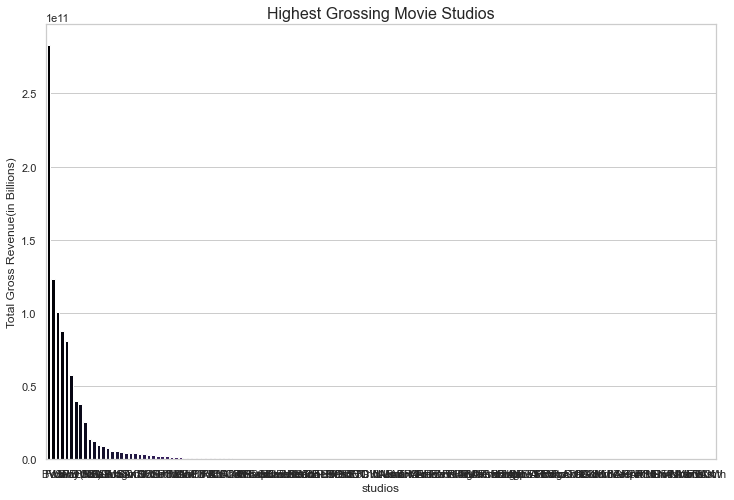

In [156]:
# Set style for better visualization
sns.set(style="whitegrid")

# Create a bar plot for studios and their total gross
plt.figure(figsize=(12, 8))
sns.barplot(x='studio', y='total_gross', data=studio_gross, palette='magma')

# Adding titles and labels
plt.title('Highest Grossing Movie Studios', fontsize=16)
plt.xlabel('studios', fontsize=12)
plt.ylabel('Total Gross Revenue(in Billions)', fontsize=12)

# Display the plot
plt.show()


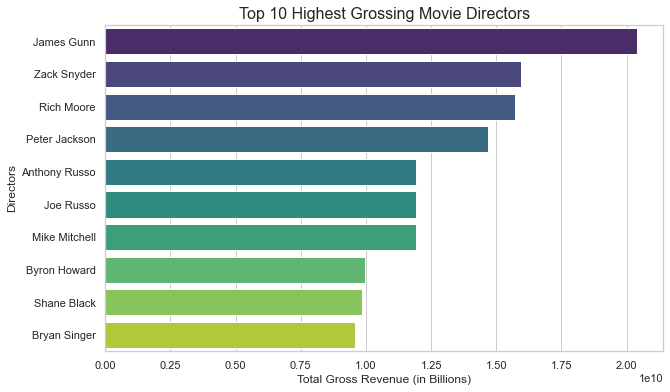

In [157]:
# Create a bar plot for directors and their total gross revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='total_gross', y='director_name', data=director_gross.head(10), palette='viridis')

# Adding titles and labels
plt.title('Top 10 Highest Grossing Movie Directors', fontsize=16)
plt.xlabel('Total Gross Revenue (in Billions)', fontsize=12)
plt.ylabel('Directors', fontsize=12)

# Display the plot
plt.show()

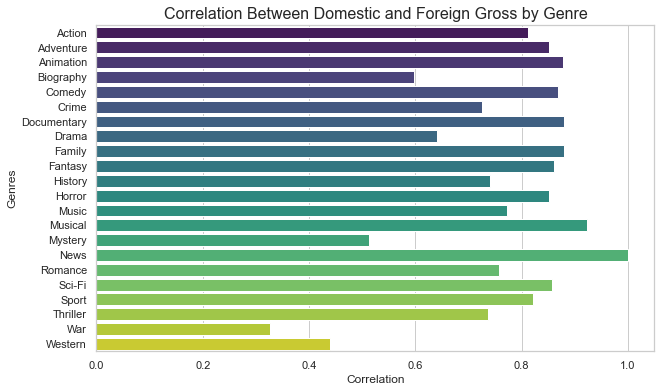

In [158]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='correlation', y='genres', data=genre_gross, palette='viridis')

# Add titles and labels
plt.title('Correlation Between Domestic and Foreign Gross by Genre', fontsize=16)
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Genres', fontsize=12)

# Show the plot
plt.show()
